In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

In [2]:
sample_freq = 1e6  # in Hz
length = 1.0  # in s
signal_strength = 0.0  # in dB
noise_strength = 0.0  # in dB

wm = ss.WirelessMicrophone(f_sample=sample_freq, t_sec=length)
sig = wm.get_soft(f_center=1e5, dB=signal_strength)

wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length)
noise = wgn.get_signal(dB=noise_strength)

assert wm.num_samples == wgn.num_samples
num_samples = wm.num_samples

both = sig + noise  # create actual signal ('both') comprising of signal and additive white gaussian noise (AWGN)

print('Signal power:    %6.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:     %6.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:             %6.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Num Samples:     %9d ' % (num_samples))

Signal power:      0.00 dB
Noise power:      -0.00 dB
SNR:               0.00 dB
Num Samples:       1000000 


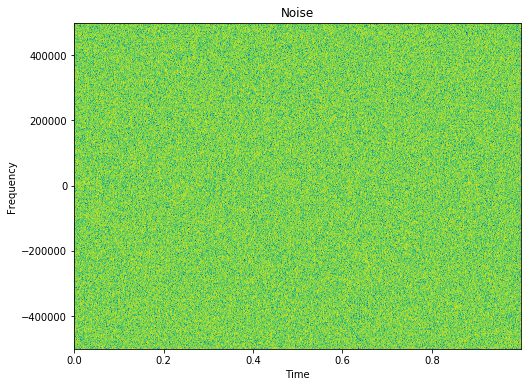

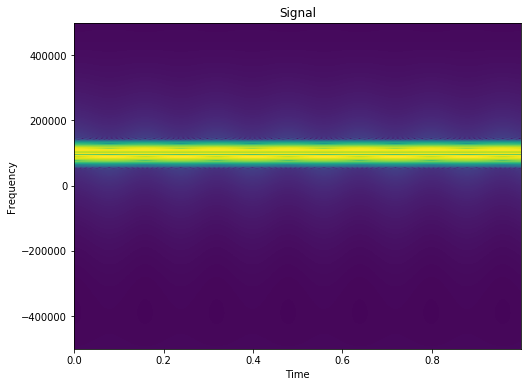

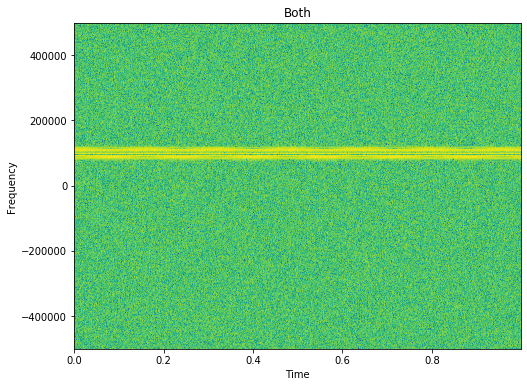

In [8]:
# Plot the resulting signals using our stft
nfft = 1024

sft = ss.Stft(n=nfft, window='flattop')
f, t, x = sft.spectogram(noise, sample_freq, normalized=True, dB=True)
plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

sft = ss.Stft(n=nfft, window='flattop')
f, t, x = sft.spectogram(sig, sample_freq, normalized=True, dB=True)
plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

sft = ss.Stft(n=nfft, window='flattop')
f, t, x = sft.spectogram(both, sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.pcolormesh(t,
               f,
               x,
               shading='flat',
               cmap='viridis',
               snap=True,
               vmin=np.min(x),
               vmax=np.max(x))
plt.title("Both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

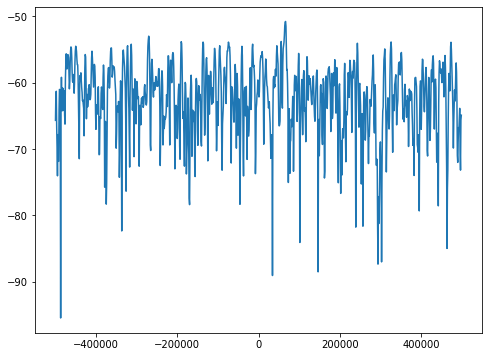

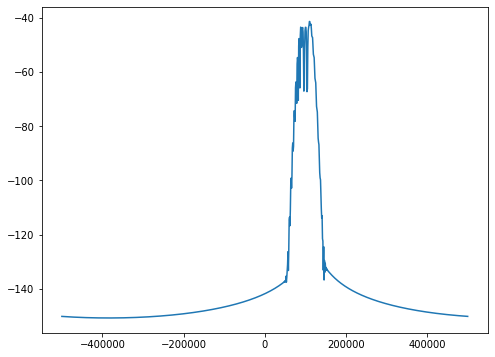

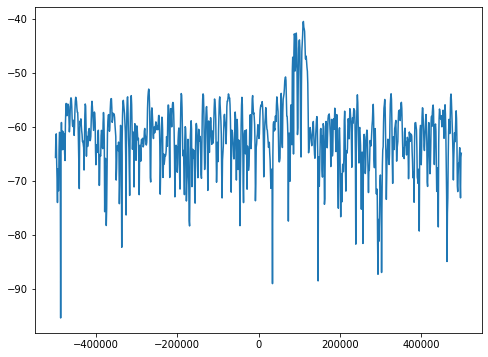

In [4]:
# Plot only 2nd (x[:, 1]) FFT bin 

sft = ss.Stft(n=1024, window='flattop')
f, t, x = sft.spectogram(noise, sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.plot(f, x[:, 1])
plt.show()

sft = ss.Stft(n=1024, window='flattop')
f, t, x = sft.spectogram(sig, sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.plot(f, x[:, 1])
plt.show()

sft = ss.Stft(n=1024, window='flattop')
f, t, x = sft.spectogram(both, sample_freq, normalized=True, dB=True)

plt.figure(figsize=(8, 6))
plt.plot(f, x[:, 1])
plt.show()

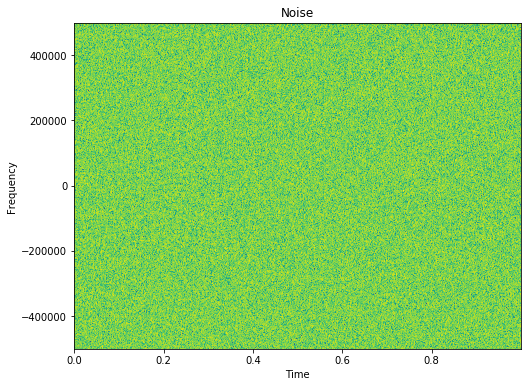

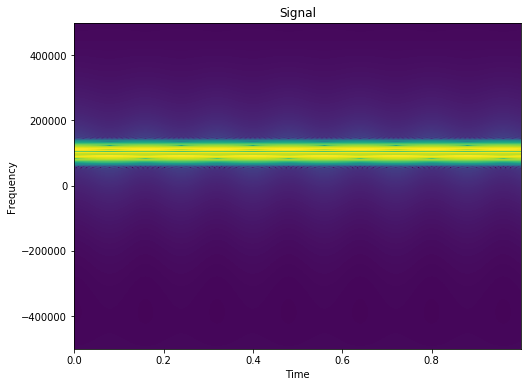

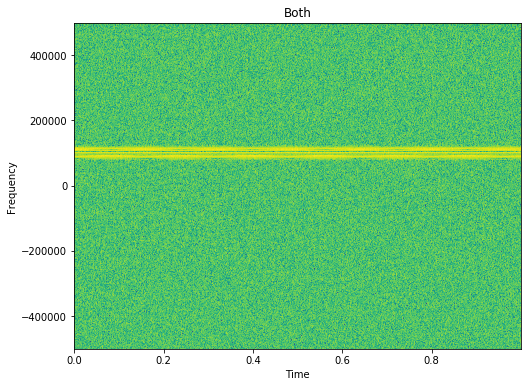

In [5]:
# Plot the resulting signals using matplotlib
nfft = 1024

plt.figure(figsize=(8, 6))
plt.specgram(noise,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(sig,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(both,
             NFFT=nfft,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('flattop', nfft))
plt.title("Both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

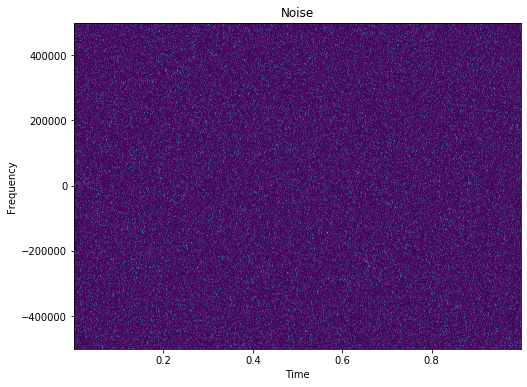

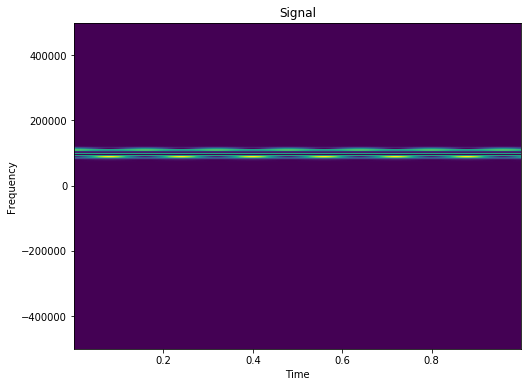

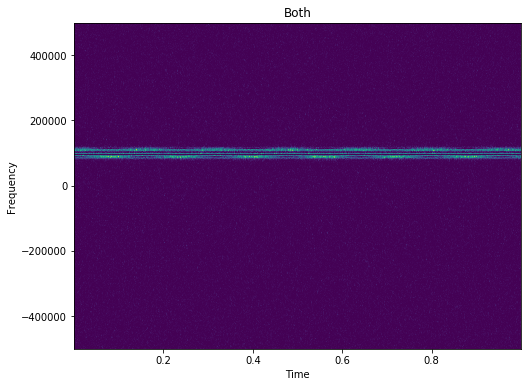

In [7]:
# Plot the resulting signals using our the scipy spectogram
from scipy import fft
nfft = 1024

plt.figure(figsize=(8, 6))
f, t, x = signal.spectrogram(noise,
                             sample_freq,
                             return_onesided=False,
                             window='flattop',
                             nperseg=nfft,
                             nfft=nfft,
                             noverlap=0,
                             detrend=False,
                             scaling='density',
                             mode='psd')
plt.pcolormesh(t, fft.fftshift(f), fft.fftshift(x, axes=0), shading='virdis')
plt.title("Noise")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
f, t, x = signal.spectrogram(sig,
                             sample_freq,
                             return_onesided=False,
                             window='flattop',
                             nperseg=nfft,
                             nfft=nfft,
                             noverlap=0,
                             detrend=False,
                             scaling='density',
                             mode='psd')
plt.pcolormesh(t, fft.fftshift(f), fft.fftshift(x, axes=0), shading='virdis')
plt.title("Signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
f, t, x = signal.spectrogram(both,
                             sample_freq,
                             return_onesided=False,
                             window='flattop',
                             nperseg=nfft,
                             nfft=nfft,
                             noverlap=0,
                             detrend=False,
                             scaling='density',
                             mode='psd')
plt.pcolormesh(t, fft.fftshift(f), fft.fftshift(x, axes=0), shading='virdis')
plt.title("Both")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()